# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

## Haberman Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#The dataset contains cases from a study that was conducted between 1958 and 1970 at the
# University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
haberman = pd.read_csv("haberman.csv")

In [3]:
# Renaming columns headings
haberman.rename(columns = {'age':'Age', 'year':'Year_Of_Operation','nodes':'Axillary_Nodes', 'status':'Survival_Status'}, inplace = True) 

In [4]:
haberman.head()

,Age,Year_Of_Operation,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# (Q) how many data-points and features?
haberman.shape

(306, 4)

# Oberservation(s) : 
The dataset has 306 rows/data-points with 4 columns/features 

In [6]:
#(Q) What are the column names in our dataset?
haberman.columns

Index(['Age', 'Year_Of_Operation', 'Axillary_Nodes', 'Survival_Status'], dtype='object')

In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                  306 non-null int64
Year_Of_Operation    306 non-null int64
Axillary_Nodes       306 non-null int64
Survival_Status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
# Modifying the target column values to be meaningful as well as categorical
haberman['Survival_Status'] = haberman['Survival_Status'].map({1:"Yes", 2:"No"})
haberman['Survival_Status'] = haberman['Survival_Status'].astype('category')
print(haberman.head())

   Age  Year_Of_Operation  Axillary_Nodes Survival_Status
0   30                 64               1             Yes
1   30                 62               3             Yes
2   30                 65               0             Yes
3   31                 59               2             Yes
4   31                 65               4             Yes


In [9]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                  306 non-null int64
Year_Of_Operation    306 non-null int64
Axillary_Nodes       306 non-null int64
Survival_Status      306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


In [10]:
haberman["Age"].head() # Age of patient at time of operation (numerical)

0    30
1    30
2    30
3    31
4    31
Name: Age, dtype: int64

In [11]:
haberman["Year_Of_Operation"].head() # Patient's year of operation (year - 1900 and onwards, numerical)

0    64
1    62
2    65
3    59
4    65
Name: Year_Of_Operation, dtype: int64

In [12]:
haberman["Axillary_Nodes"].head()  # Number of axillary nodes detected (numerical)

0    1
1    3
2    0
3    2
4    4
Name: Axillary_Nodes, dtype: int64

In [13]:
haberman["Survival_Status"].head() # Survival status (class attribute) Yes = the patient survived 5 years or longer; No = the patient died within 5 years

# balanced-dataset vs imbalanced dataset
#Haberman is an imbalanced dataset as the number of data points for both the status type isn't equal.

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Survival_Status, dtype: category
Categories (2, object): [No, Yes]

In [14]:
print(haberman.describe())
print("*"*70)
print(haberman.info())

              Age  Year_Of_Operation  Axillary_Nodes
count  306.000000         306.000000      306.000000
mean    52.457516          62.852941        4.026144
std     10.803452           3.249405        7.189654
min     30.000000          58.000000        0.000000
25%     44.000000          60.000000        0.000000
50%     52.000000          63.000000        1.000000
75%     60.750000          65.750000        4.000000
max     83.000000          69.000000       52.000000
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                  306 non-null int64
Year_Of_Operation    306 non-null int64
Axillary_Nodes       306 non-null int64
Survival_Status      306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


# Observation(s) : 

 Minimum Age of patients- 30; Maximum Age of patients- 83
 
 75% of patient has less than 4 axillary nodes and 25% has no nodes

In [15]:
print(haberman.iloc[:,-1].value_counts())
print("*"*50)
print(haberman.iloc[:,-1].value_counts(normalize = True))
# The target column(Survival_Status) is imbalanced with 73% of values as 'Yes'

Yes    225
No      81
Name: Survival_Status, dtype: int64
**************************************************
Yes    0.735294
No     0.264706
Name: Survival_Status, dtype: float64


# Observation(s): 

Here, Survival_Status is the target column where 225rows(people) with 'Yes'(survived) and columns(people) with 'No'(not survived)


# (3.2) 2-D Scatter Plot

Text(0.5,1,'Scatter Plot of Haberman Dataset With Two Classes and Points')

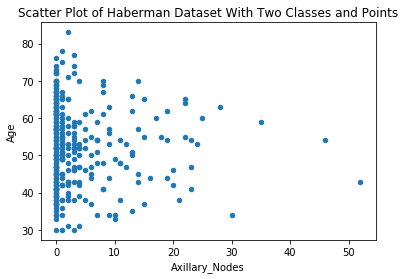

In [16]:
#2-D scatter plot:

haberman.plot(kind='scatter', x='Axillary_Nodes', y='Age') ;
plt.title('Scatter Plot of Haberman Dataset With Two Classes and Points')
#cannot make much sense out it. 
#What if we color the points by thier class-label

Text(0.5,1,"Scatter Plot depicting 'Survival_Status' using 'Axillary_Nodes' and 'Age' by color-coding")

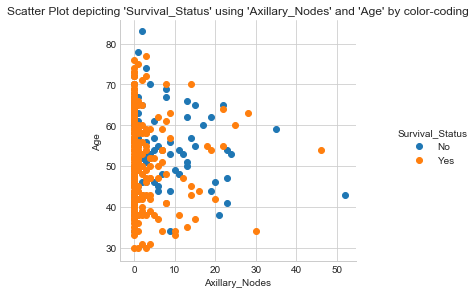

In [19]:
# Better to use color-coding for each status
# 2-D Scatter Plotting with color-coding
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4).map(plt.scatter, "Axillary_Nodes", "Age").add_legend();
plt.title("Scatter Plot depicting \'Survival_Status\' using \'Axillary_Nodes\' and \'Age\' by color-coding")

# Observation(s):
The classification is not possible using age and nodes, as there is a considerable overlapping between both the blue and yellow dots.

Text(0.5,1,"Scatter Plot depicting 'Survival_Status' using 'Year_Of_Operation' and 'Age' by color-coding")

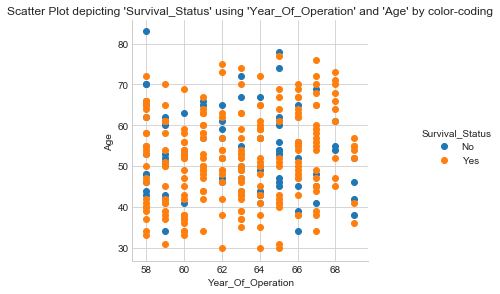

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4).map(plt.scatter, "Year_Of_Operation", "Age").add_legend();
plt.title("Scatter Plot depicting \'Survival_Status\' using \'Year_Of_Operation\' and \'Age\' by color-coding")

# Observation(s):
Same overlapping issue

Text(0.5,1,"Scatter Plot depicting 'Survival_Status' using 'Axillary_Nodes' and 'Year_Of_Operation' by color-coding")

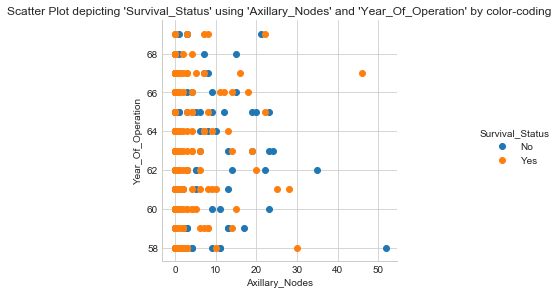

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Axillary_Nodes", "Year_Of_Operation") \
   .add_legend();
plt.title("Scatter Plot depicting \'Survival_Status\' using \'Axillary_Nodes\' and \'Year_Of_Operation\' by color-coding")

# Observation(s):
Notice that the blue and yellow data points cannot be easily seperated.
Can we draw multiple 2-D scatter plots for each combination of features?
How many cobinations exist? 3C2 = 3.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

Text(0.5,1,'Scatter plots for joint relationships and histograms')

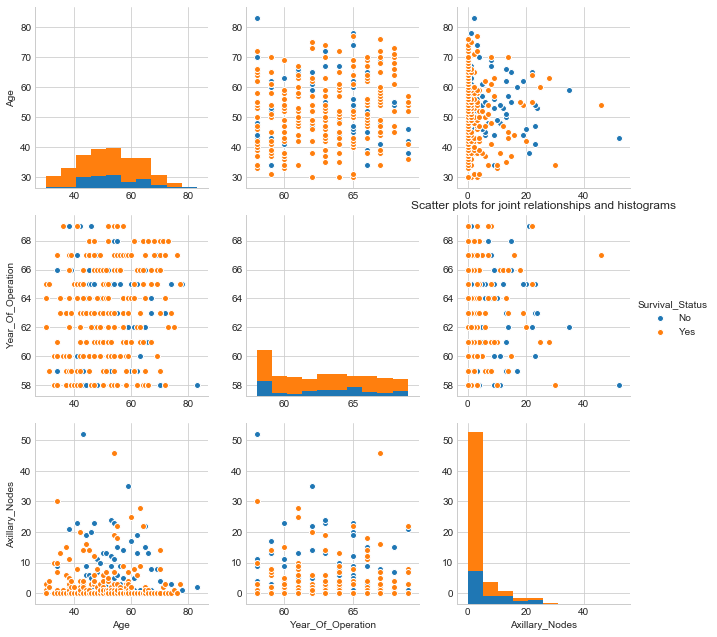

In [22]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3);
plt.title('Scatter plots for joint relationships and histograms')
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

# **Observations**
Considering the feature 'Age' and 'Axillary_Nodes' plotting in the Plot 3 and 7 for my all further data operations, as there is less overlapping of data-points compared to other plots.

# (3.4) Histogram, PDF, CDF

Text(0.5,1,"1D Scatter plot using 'Age' to depict 'Survival_Status'")

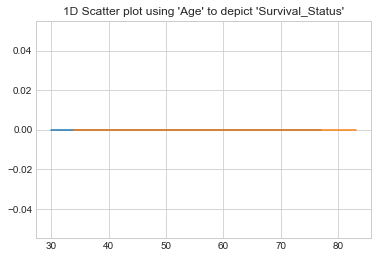

In [23]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of Age
import numpy as np
#Yes = the patient survived 5 years or longer; No = the patient died within 5 years


haberman_status_positive = haberman.loc[haberman["Survival_Status"] == "Yes"];
haberman_status_negative = haberman.loc[haberman["Survival_Status"] == "No"];

#print(iris_setosa["petal_length"])
plt.plot(haberman_status_positive["Age"], np.zeros_like(haberman_status_positive['Age']))
plt.plot(haberman_status_negative["Age"], np.zeros_like(haberman_status_negative['Age']))
plt.title('1D Scatter plot using \'Age\' to depict \'Survival_Status\'')
# Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.
# Hence, it's better to use histograms

Text(0.5,1,"1D Scatter plot using 'Axillary_Nodes' feature to depict 'Survival_Status'")

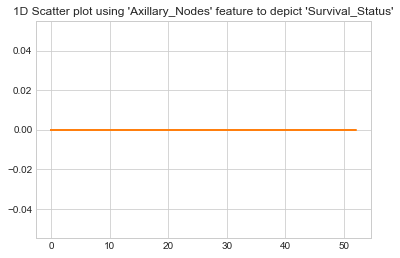

In [24]:
plt.plot(haberman_status_positive["Axillary_Nodes"], np.zeros_like(haberman_status_positive['Axillary_Nodes']))
plt.plot(haberman_status_negative["Axillary_Nodes"], np.zeros_like(haberman_status_negative['Axillary_Nodes']))
plt.title('1D Scatter plot using \'Axillary_Nodes\' feature to depict \'Survival_Status\'')

Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.
Are there better ways of visualizing 1-D scatter plots?

Text(0.5,1,"Probability Distribution Function(PDF) vs 'Age'")

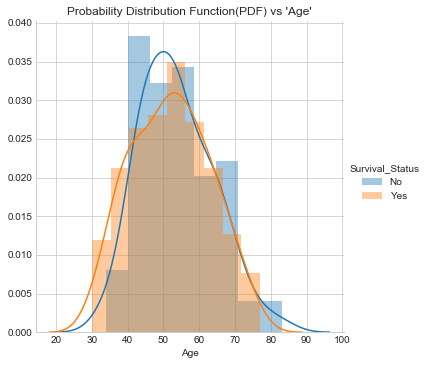

In [28]:
# A better way to visualize 1-D scatter plots
# And, the bold lines bounding the histograms is PDF(=smoothed histogram(done by KDE))

# We draw this using seaborn as sns, 
#    Facetgrid gives grid layout
#    haberman is data-set
#    hue colors the value/columnname that you give to it
#    Size is graph size and mapping all these to sns.distplot on "Age" column.

sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();

# plt.title('Histogram depicting \'Survival_Status\' using \'Age\' feature by color-coding')
plt.title('Probability Distribution Function(PDF) vs \'Age\'')

# Observation(s):
People with age 50 to 60 have more survival rate.
Though at the age range from 34–77 the status of survival and death is same. So, using this datapoint we cannot predict anything

Text(0.5,1,"Probability Distribution Function(PDF) vs 'Year_Of_Operation'")

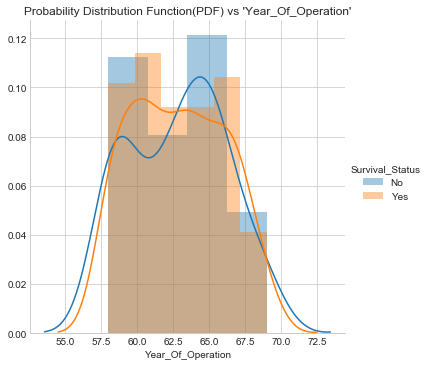

In [29]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Year_Of_Operation") \
   .add_legend();

# plt.title('Histogram depicting \'Survival_Status\' using \'Year_Of_Operation\' feature by color-coding')
plt.title('Probability Distribution Function(PDF) vs \'Year_Of_Operation\'')

# Observation(s):
 People who had operation in the year from 58 to 66 had more survival rate.
 Similarly, here we cannot predict anything as such with these histograms as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.

Text(0.5,1,"Probability Distribution Function(PDF) vs 'Axillary_Nodes'")

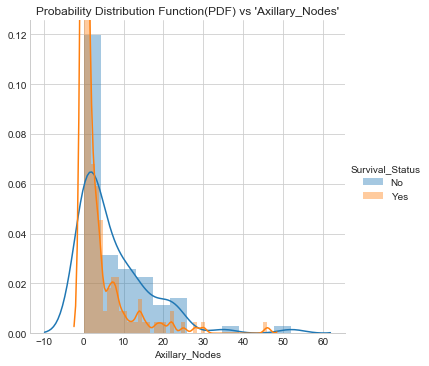

In [30]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Axillary_Nodes") \
   .add_legend();

# plt.title('Histogram depicting \'Survival_Status\' using \'Axillary_Nodes\' feature by color-coding')
plt.title('Probability Distribution Function(PDF) vs \'Axillary_Nodes\'')

# Observation(s):
People with 0-3 axillary nodes had more survival rate.
Thus it has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data feature to choose among all. So, lets consider the PDF of Axillary nodes and can conclude below result.

**if(AxillaryNodes≤0)**

     Patient= Long survival
    
**else if(AxillaryNodes≥0 && Axillary nodes≤3.5(approx))**

     Patient= Long survival and chances are high
    
**else if(Axillary nodes ≥3.5)**

     Patient = Short survival
    
So from the above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive. To know that we have another distribution that is CDF, which will give the cumulative plot of PDF so that we can calculate what are the exact percentage of patient survival status

In [25]:
haberman_status_positive["Survival_Status"].describe()

count     225
unique      1
top       Yes
freq      225
Name: Survival_Status, dtype: object

In [26]:
haberman_status_negative["Survival_Status"].describe()

count     81
unique     1
top       No
freq      81
Name: Survival_Status, dtype: object

In [27]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.

# Interpreting a PDF:

Text(0.5,1,"PDF & CDF plots for 'Positive_Survival_Status'")

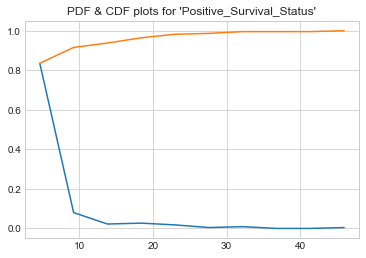

In [48]:
# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of Age

counts, bin_edges = np.histogram(haberman_status_positive["Axillary_Nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


# plt.title('Graph depicting \'Positive_Survival_Status\' using \'Axillary_Nodes\' feature by color-coding')
plt.title('PDF & CDF plots for \'Positive_Survival_Status\'')

# Observation(s):
CDF(orange line) plot shows there is a 85% chance of postive survival, if number of axillary nodes detected are < 5. 
Also one can see as number of axillary nodes increases survival chances also reduces means, it is clearly observed that 80% — 85% of people have good chances of survival if they have less number of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40.

PDF(blue line) plot shows that almost 80% of the patients have positive lymph nodes less than 10.

Text(0.5,1,"PDF & CDF plots for 'Negative_Survival_Status'")

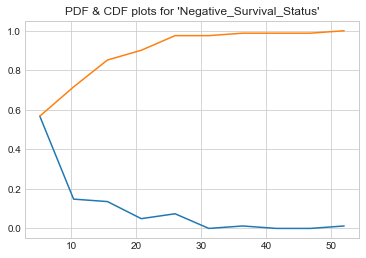

In [49]:
counts, bin_edges = np.histogram(haberman_status_negative["Axillary_Nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


# plt.title('Graph depicting \'Negative_Survival_Status\' using \'Axillary_Nodes\' feature by color-coding')
plt.title('PDF & CDF plots for \'Negative_Survival_Status\'')

# Observation(s):
Same as for postive survival, here CDF(orange line) shows that there is a 55% chance of negative survival, if number of axillary nodes detected are < 5. And, there are nearly 100% of people in short survival if nodes are > 40 

PDF plot, we can see that almost 80% of the patients have negative lymph nodes less than 6.

# (3.5) Mean, Variance and Std-dev

In [29]:
#Mean, Variance, Std-deviation,  

# Mean (To depict that the datpoints range within a range)
# Here, Mean of Positive_Survival_Status is 2.792(approx.), and mean Negative_Survival_Status is 7.45 respectively which shows that patient with less axillary nodes
# were more likely to survive than other patients with more axillary nodes.
print("Means:")
print(np.mean(haberman_status_positive["Axillary_Nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_status_positive["Axillary_Nodes"],50)));
print(np.mean(haberman_status_negative["Axillary_Nodes"]))


print("\nStd-dev:");
print(np.std(haberman_status_positive["Axillary_Nodes"]))
print(np.std(haberman_status_negative["Axillary_Nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# Observation(s):
Mean of Positive_Survival_Status is 2.792(approx.), and mean Negative_Survival_Status is 7.45 respectively which shows that patient with less axillary nodes were more likely to survive than other patients with more axillary nodes.

Positive_Survival_Status has Standard Deviation of 5.857(approx.) and Negative_Survival_Status has 9.129(approx.), means the spread of data for Negative_Survival_Status is more.

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [30]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_status_positive["Axillary_Nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_status_positive["Axillary_Nodes"],50)));
print(np.median(haberman_status_negative["Axillary_Nodes"]))


print("\nQuantiles:")
print(np.percentile(haberman_status_positive["Axillary_Nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status_negative["Axillary_Nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_status_positive["Axillary_Nodes"],90))
print(np.percentile(haberman_status_negative["Axillary_Nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_status_positive["Axillary_Nodes"]))
print(robust.mad(haberman_status_negative["Axillary_Nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Observation(s):
It says, all percentile from 0 to 100 with a gap of 25.

[0. 0. 0. 3.] depicts the 0th, 25th, 50th and 75th percentile values respectively of Axillary_Nodes feature/column for the data points containg only the Positive_Survival_Status

[ 0.  1.  4. 11.] depicts the 0th, 25th, 50th and 75th percentile values respectively of Axillary_Nodes feature/column for the data points containg only the Negative_Survival_Status

In [31]:
# IQR(Inter-Quartile Range)
# 75th percentile - 25th percentile = 3 - 0 = 3, it means 50% of datapoints lies within this value range of Axillary_Nodes for Positive_Survival_Status
# # 75th percentile - 25th percentile = 11 - 1 = 10, it means 50% of datapoints lies within this value range of Axillary_Nodes for Negative_Survival_Status

# (3.7) Box plot and Whiskers

Text(0.5,1,"Boxplot for 'Survival_Status' and 'Axillary_Nodes'")

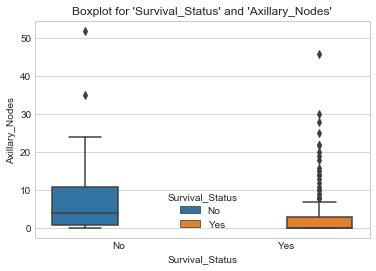

In [51]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Survival_Status',y='Axillary_Nodes', data=haberman, hue= 'Survival_Status')
plt.title('Boxplot for \'Survival_Status\' and \'Axillary_Nodes\'')

# Obseervation(s):
 The three lines in the boxes formed signifies 25th, 50th and 75th percentile value from bottom to top respectively.

Whisker 25th and 50th percentile value is 0, and 75th percentile value is 3 for Positive_Survival_Status.
 
Also, for Negative_Survival_Status there are 50th percentile of nodes are nearly same as Positive_Survival_Status 75th percentile. Threshold for the Negative_Survival_Status us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2

So,if nodes between 0–7 have chances of error as Negative_Survival_Status plot also lies in it, i.e, 50% error for Negative_Survival_Status

# (3.8) Violin plots

Text(0.5,1,"Violinplot for 'Survival_Status' and 'Axillary_Nodes'")

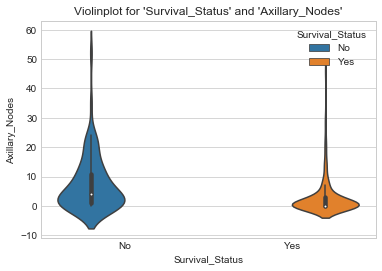

In [43]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Violin plots also like box plots, but these give pdf along with box plots in it. they look a voilin, so named to

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Survival_Status", y="Axillary_Nodes", data=haberman, size=8, hue= 'Survival_Status')
plt.title('Violinplot for \'Survival_Status\' and \'Axillary_Nodes\'')

Text(0.5,1,"Violinplot for 'Survival_Status' and 'Year_Of_Operation'")

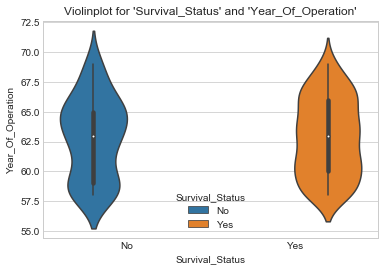

In [44]:
sns.violinplot(x="Survival_Status", y="Year_Of_Operation", data=haberman, size=8, hue= 'Survival_Status')
plt.title('Violinplot for \'Survival_Status\' and \'Year_Of_Operation\'')

# Observation(s):

People with operation year from 58 to 66 survived more as after that the graph decreased

People with axillary nodes from 0 to 3 survived more as after that the graph decreased

In Violin plot for Axillary_Nodes, we observe that for Positive_Survival_Status(Orange Violin) it shows the more density for axillary_nodes value ranging from 0–7 and threshold from 0–3. And in Negative_Survival_Status(Blue Violin) it shows the more density for axillary_nodes value ranging from 0–25 and threshold from 0–12.

In Violin Plot for Year_Of_Operation, we observe the patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.

# (3.10) Univariate, bivariate and multivariate analysis.

Univariate analysis:- 
Provides summary statistics for each field in the raw data set (or) summary only on one variable. Ex:- CDF,PDF,Box plot, Violin plot.(dont worry, will see below what each of them is)

Bivariate analysis:- 
Performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding realtionship between them.Ex:-Box plot,Voilin plot.

Multivariate analysis:- 
Performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.

# (3.11) Multivariate probability density, contour plot.


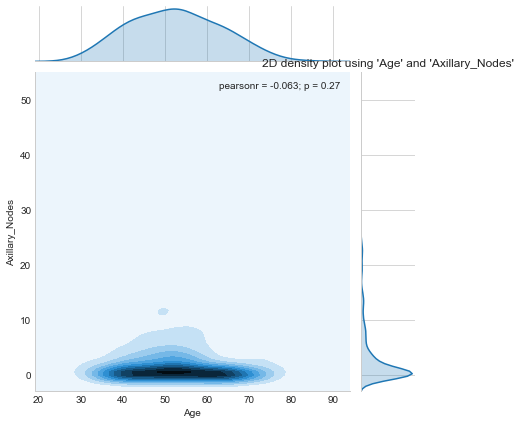

In [40]:
#2D Density plot, contours-plot
sns.jointplot(x="Age", y="Axillary_Nodes", data=haberman, kind="kde");
plt.title('2D density plot using \'Age\' and \'Axillary_Nodes\'');

# Observation(s): 
Above is the 2D density plot for Survival_Status using feature Age and Axillary_Nodes, it is observed the density of point for Survival_Status is positive from Age range 47–60 and Axillary_Nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot

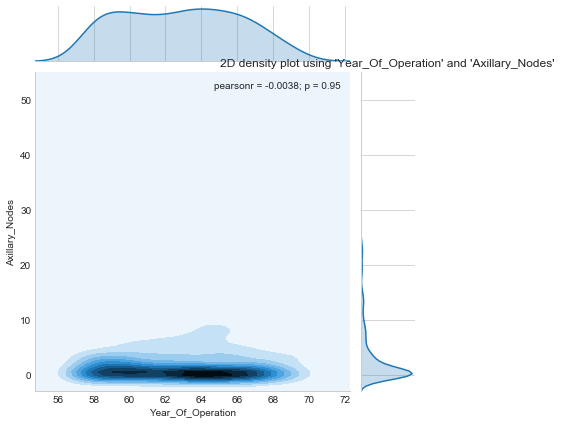

In [39]:
#2D Density plot, contours-plot
sns.jointplot(x="Year_Of_Operation", y="Axillary_Nodes", data=haberman, kind="kde");
plt.title('2D density plot using \'Year_Of_Operation\' and \'Axillary_Nodes\'');

# Observation(s): 
Above is the 2D density plot for Survival_Status using feature Year_Of_Operation and Axillary_Nodes, it is observed the density of point for Survival_Status is positive for Year_Of_Operation from 1958–66 and Axillary_Nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot

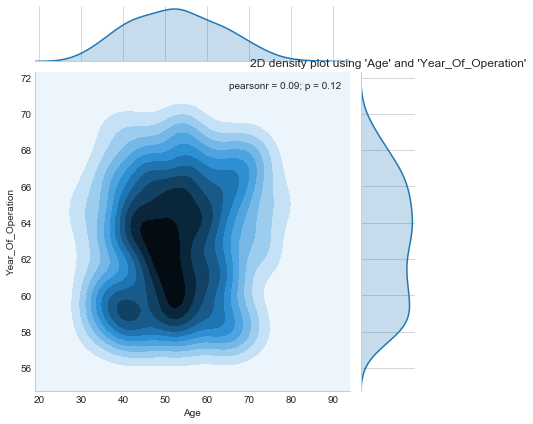

In [41]:
#2D Density plot, contours-plot
sns.jointplot(x="Age", y="Year_Of_Operation", data=haberman, kind="kde");
plt.title('2D density plot using \'Age\' and \'Year_Of_Operation\'');

# Observation(s): 
Above is the 2D density plot for Survival_Status using feature Age and Year_Of_Operation, it is observed the density of point for Survival_Status is positive from Age 47-60 and for Year_Of_Operation from 1958–66. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot

# Conclusion:

Haberman is a data-set with 306 entries/data-points and 4-features(Age, Year_Of_Operation, Axillary_Nodes and Survival_Status being the target column)

Also, it's an imbalanced dataset as the number of data points for both the survival status type isn't equal.

The data is overlapping in most of the region, hence it is not seperable using the features given

The chances of survival are more for patients with axillary_nodes ranging from 0 to 3

Minimum Age of patients- 30 and Maximum Age of patients- 83

Patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.

 **References:**
1. https://medium.com/
2. https://www.kaggle.com/
3. https://towardsdatascience.com/